<p style="background-color:#3498db;font-family:candaralight;color:#ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">CHẨN ĐOÁN UNG THƯ VÚ VỚI K-NEAREST NEIGHBOURS</p>

<div style="width:100%;text-align: center;"> <img align=middle src="../asset/image/visualization_image.ppm" alt="Heat beating" > </div>




#### Dự án "Chẩn đoán ung thư vú với K-nearest neighbours" sử dụng bộ dữ liệu ung thư vú UCI nhằm giải quyết bài toán phân loại dự đoán bệnh nhân có bị ung thư không
#### - Ngôn ngữ sử dụng : Python
#### - Mô hình sử dụng trong dự án: 
* [ K-NEAREST NEIGHBOURS](#1)
   - [Bài toán phân loại nhị phân](#1.1)

   
 **<span style="color:red;"> Mong mọi người xem xét và cho ý kiến về Notebook.</span>**


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#3498db; font-family:'Candara Light', sans-serif; color:#ffffff; font-size:175%; text-align:center; border-radius:10px; padding:10px;">Các mục chính</p>


* [1. Data OverView](#1)
    
    - [Import Thư viện](#1.1)
    
    - [Tải dataset](#1.2)
    
    - [Mô tả dữ liệu](#1.3)
        
* [2. Tiền xử lý dữ liệu (Data Preprocessing)](#2)   

    - [Làm sạch dữ liệu (Data cleaning)](#2.1)      
        
    - [Chuyển dạng dữ liệu (Data transformation)](#2.2)

* [3. Thống kê mô tả (Descriptive statistics)](#3)
    
    - [Câu hỏi thống kê](#3.1)

* [4. Mô hình (Modeling)](#4)

* [5. Thử nghiệm mô hình (model testing)](#5)

* [6. Đánh giá và so sánh mô hình (Model Evaluation and Comparison)](#6)

* [7. Tối ưu siêu tham số (Hyper parametter optimization)](#7)

* [8. Kết luận và hướng phát triển (Conclusion)](#7)



   <a id='1'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA OVERVIEW </p>

<div style="text-align:center;"> Ở trong notebook này, Bộ dữ liệu về ung thư vú được sử dụng để tiến hành chẩn đoán </div>

<a id="1.1"></a>
### Import thư viện cần thiết (Import necessary libraries)

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter
import time
import optuna
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Import thư viện sklearn nhằm mục đích so sánh với mô hình tự xây dựng
from sklearn.neighbors import KNeighborsClassifier

 <a id="1.2"></a>
###  Tải dataset

In [2]:
df = pd.read_csv('../data/data.csv')

 <a id="1.3"></a>
###   Mô tả dữ liệu (Data Description)

In [3]:
# Mô tả kiểu dữ liệu của từng cột trong data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Xem 10 dòng đầu tiên của dataset
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<a id='2'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TIỀN XỬ LÝ DỮ LIỆU (DATA PREPROCESSING) </p>
Với phần này, ta sẽ tiến hành làm sạch (cleaning) và chuyển dạng (transformation) dữ liệu

<a id="2.1"></a>
### Làm sạch dữ liệu (Data cleaning) 
    
Kiểm tra dữ liệu thiếu và dự liệu lặp.

In [5]:
# Kiểm tra dữ liệu thiếu 
print("Null values", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values 0
NA values: False


In [6]:
df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Kiểm tra dữ liệu lặp
df.duplicated().sum()

0

<a id="2.2"></a>
###  Chuyển dạng dữ liệu (Data transformation)
Xóa cột index và tiến hành lấy index mặc đinh làm cột index chính <br>


In [8]:
df.reset_index(drop=True)
df.drop('id', axis=1, inplace=True)

In [9]:
print("Total rows: ", df.shape[0])
print("Total columns: ", df.shape[1])

Total rows:  569
Total columns:  31


In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Chia dữ liệu để thử nghiệm

In [11]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Encode tập y

In [12]:
y = (y=='M').astype('int')

<a id='3'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> THỐNG KÊ MÔ TẢ (DESCRIPTIVE STATISTICS) </p>

Trong phần này, nhóm sẽ tiến hành đặt các câu hỏi thống kê cho dữ liệu, song song với đó sẽ là các bảng biểu và biểu đồ thích hợp để diễn tả. Cuối cùng là phần kết luận

<a id="3.1"></a>
###  Câu hỏi thống kê 
    
Đặt ra các vấn đề thống kê nhằm hiểu rõ hơn về dữ liệu.

<p style="color:#3498db"> 
1. Count (Số lượng): Số lượng giá trị không rỗng (non-null) trong mỗi cột. <br>
2. Mean (Trung bình): Giá trị trung bình của dữ liệu. <br>
3. Std (Độ lệch chuẩn): Độ lệch chuẩn của dữ liệu, đo độ biến động của dữ liệu. <br>
4. Min (Giá trị nhỏ nhất): Giá trị nhỏ nhất trong dữ liệu. <br>
5. 25%, 50%, 75% (Phân vị 25%, 50%, 75%): Các phân vị của dữ liệu, cung cấp thông tin về phân phối của dữ liệu. <br>
6. Max (Giá trị lớn nhất): Giá trị lớn nhất trong dữ liệu. </p>

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Giải thích các biến:
- radius_mean, texture_mean, perimeter_mean, area_mean : các biến liên quan chặt chẽ tới kích thước và hình dạng của tế bào
- smoothness_mean,compactness_mean: độ mịn và độ đặc của tế bào , phản ánh cấu trúc tế bào
- concavity_mean, concave points_mean: Liên quan đến sự uốn cong và các điểm lõm của tế bào
- Symmetry_mean, fractal_dimension_mean: tính đối xứng và chiều mịn của tế bào 
- Các biến hậu tố _se là các giá trị lỗi chuẩn của các đặc trưng trên
- Các biến với hậu tố _worst  là các giá trị lớn nhất trong 3 lần đo của các đặc trưng trên

Một số quan sát rút ra :
1. Tổng số quan sát là 569
2. Giá trị cao nhất, thấp nhất của các cột dữ liệu khác nhau đáng kể cho thấy phạm vi giá trị lớn của các biến
3. Độ lệch chuẩn của từng biến khá lớn, cho thấy mức độ biến động cao của dữ liệu

<p style="color:#3498db"> Kiểm tra phân phối dữ liệu </p>

In [19]:
df_statistic = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]
df_statistic['diagnosis'] = (df_statistic['diagnosis'] =='M').astype('int')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_38124\3305731488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistic['diagnosis'] = (df_statistic['diagnosis'] =='M').astype('int')


array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>],
       [<Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>],
       [<Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >]],
      dtype=object)

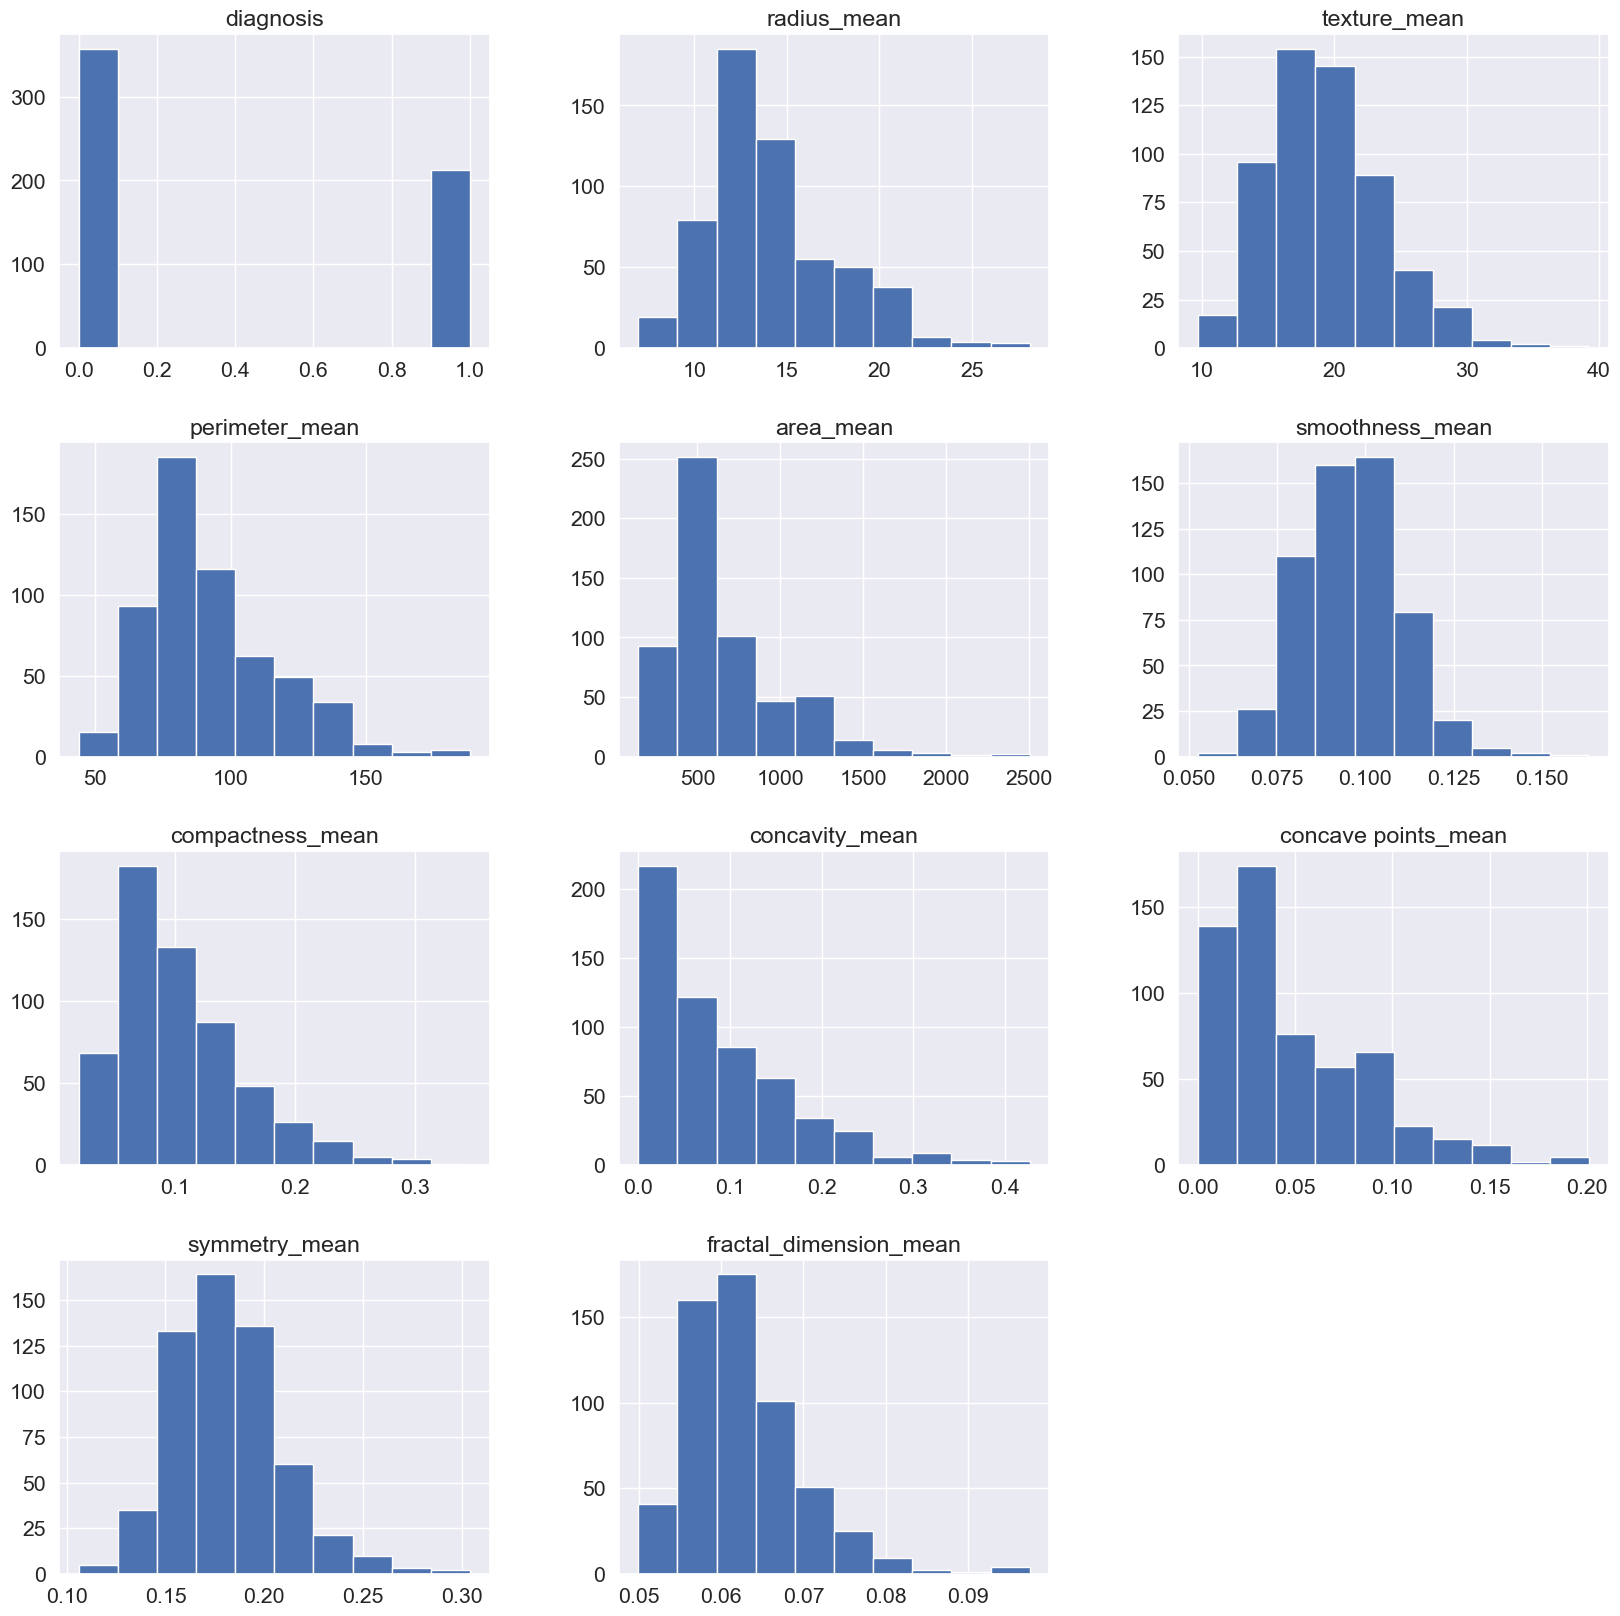

In [20]:
df_statistic.hist(figsize = (20,20))

<p style="color:#3498db"> Độ tương quan giữa các biến </p>

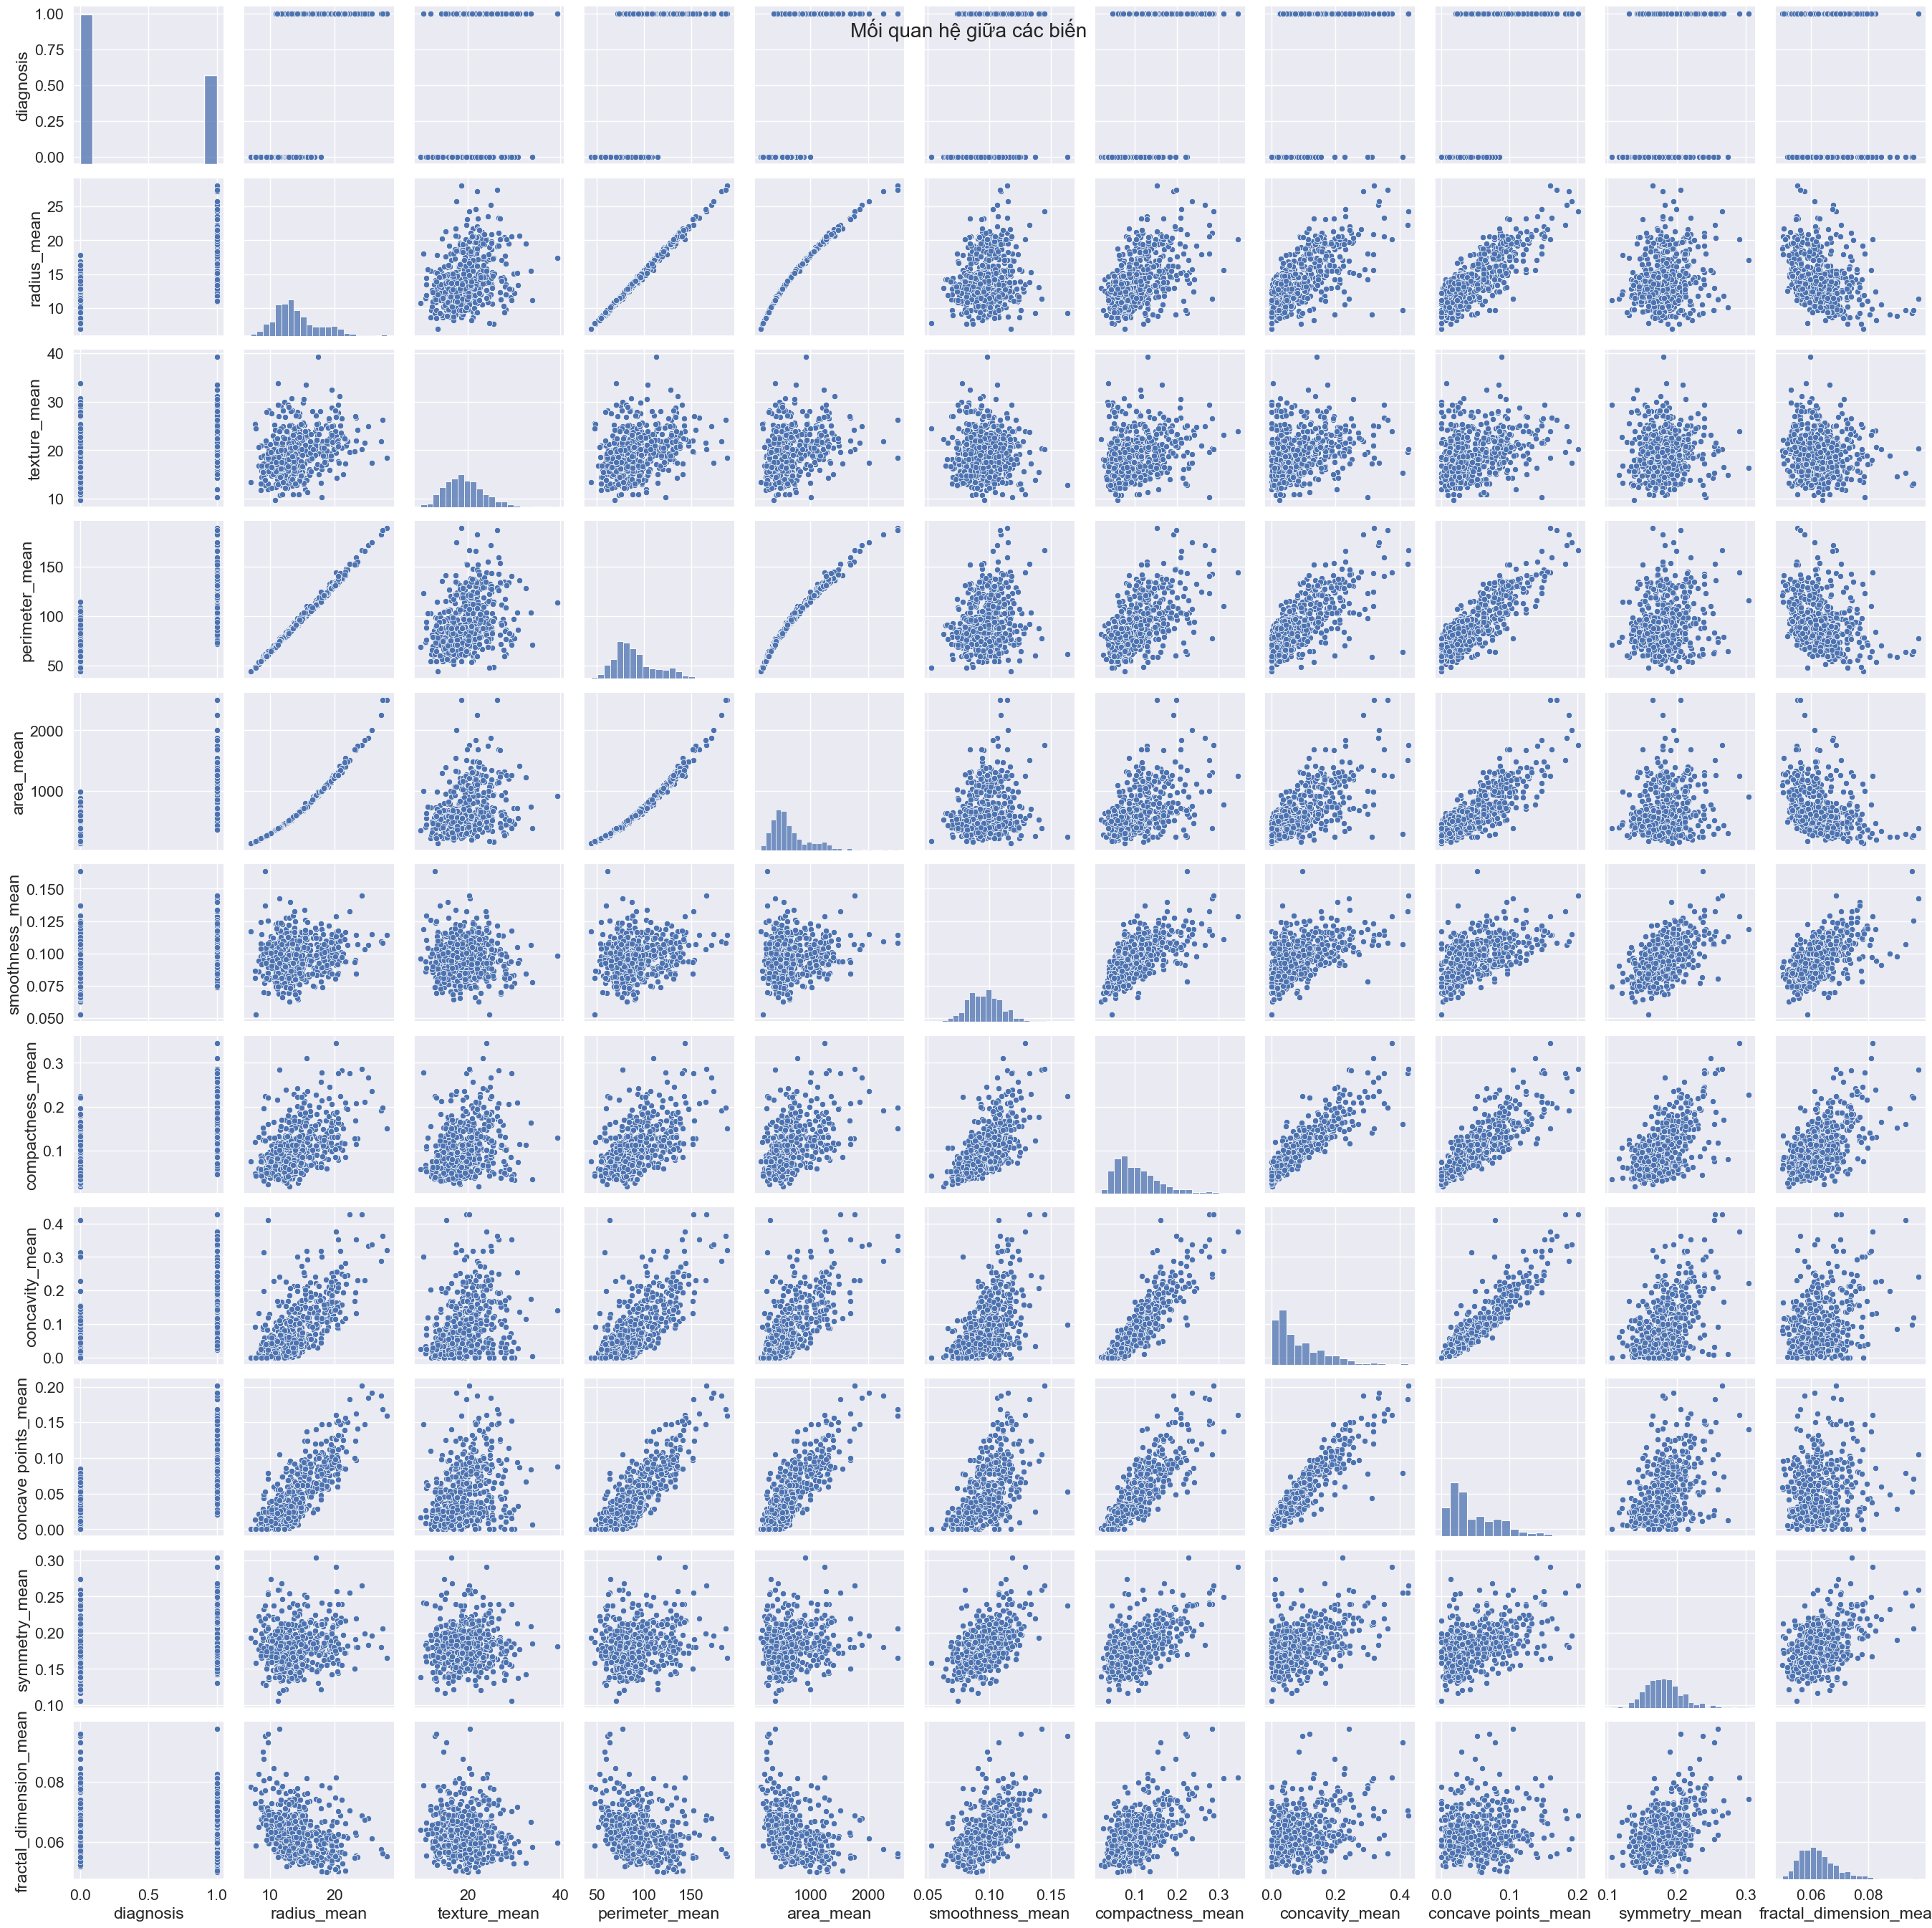

In [23]:
sns.pairplot(df_statistic)
plt.suptitle('Mối quan hệ giữa các biến')
plt.show()

Hệ số Tương quan Pearson: giúp tìm hiểu mối quan hệ giữa hai lượng. Nó cung cấp đo lường về sức mạnh của mối liên kết giữa hai biến. Giá trị của Hệ số Tương quan Pearson có thể nằm trong khoảng từ -1 đến +1. Giá trị 1 có nghĩa là chúng có mối tương quan cao và giá trị 0 có nghĩa là không có tương quan.

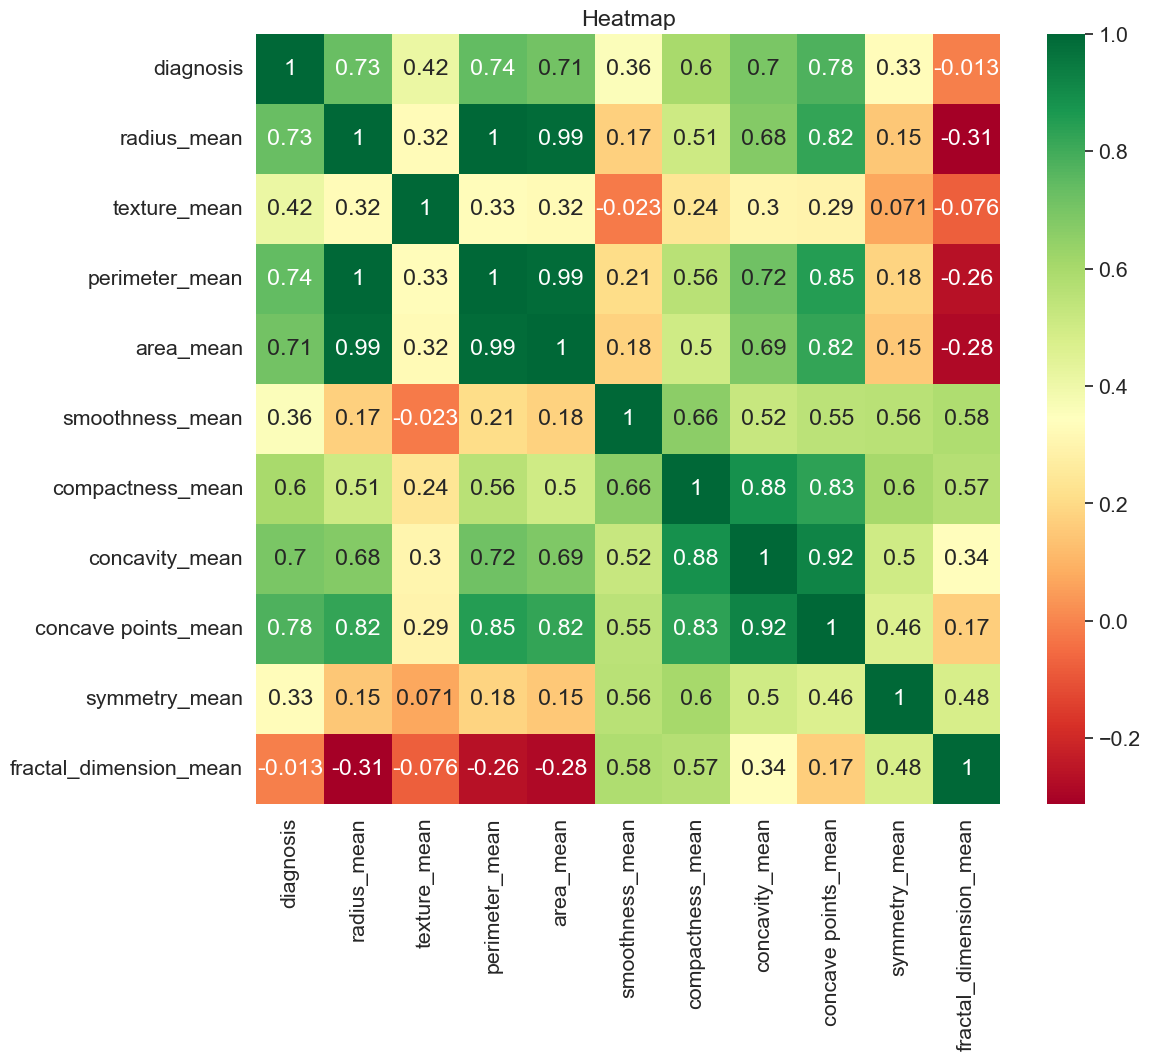

In [25]:
plt.figure(figsize=(12,10)) 
plt.title('Heatmap')
p=sns.heatmap(df_statistic.corr(), annot=True,cmap ='RdYlGn')

   <a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TẠO MÔ HÌNH (MODELING) </p>

Ở phần này, nhóm sẽ tiến hành tạo model dựa trên dữ liệu được xử lý trước đó



### Chia dữ liệu (Split data)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Xây dựng KNN Model

Tiến hành xây dựng class KNN chứa các phương thức fit và predict theo 3 độ đo là mahattan, ecludian và minkowski

In [119]:
class KNN_Model():
    # Khởi tạo các biến trong hàm init
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p
    
    # Xây dựng độ đo euclidenan
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    # Xây dựng độ đo manhattan
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))
    
    # Xây dựng độ đo minkowski
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1-v2)**p)**(1/p)
        
    # Xây dựng hàm fit
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # Xây dựng hàm Predict
    def predict(self, X_test):
        preds = []
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = Counter(nearest_neighbours).most_common(1)[0][0]
            preds.append(majority)
        return np.array(preds)
    
    # Xây dựng hàm lấy điểm gần nhất
    def get_neighbours(self, test_row):
        distances = list()
        
        # Tính khoảng cách tất cả các điểm trong tập train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distances.append((dist, train_class))
            
        # sắp xếp lại 
        distances.sort(key=lambda x: x[0])
        
        # Xác định k
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours

### Dựng hàm đánh giá

In [73]:
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

### Chạy mô hình 

In [179]:
# Lặp qua các độ đo được xây dựng
for metric in ['euclidean','manhattan', 'minkowski']:
    clf = KNN_Model(k=5, metric=metric, p=2)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)
    accuracy_value = accuracy(preds, y_test)
    print(f'Metric: {metric}, accuracy: {accuracy_value:.3f} %')


Metric: euclidean, accuracy: 87.719 %
Metric: manhattan, accuracy: 91.228 %
Metric: minkowski, accuracy: 87.719 %


<a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> THỬ NGHIỆM MÔ HÌNH <br> (MODEL TESTING) </p>


### Thử nghiệm mô hình với độ đo manhattan

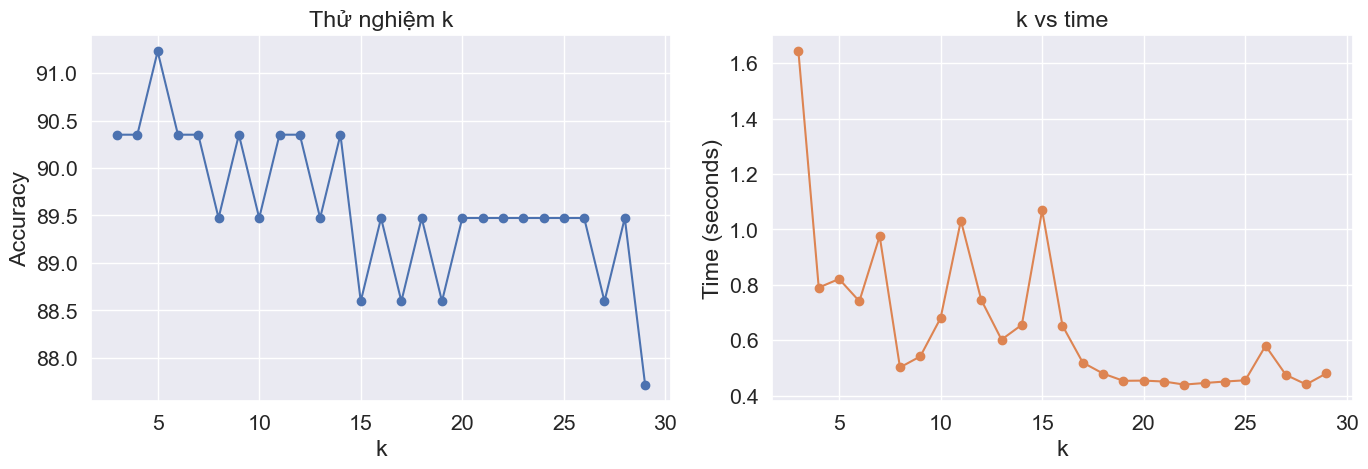

In [128]:
k_max = 30
accuracies = []
times = []
# Sử dụng vòng lặp thử nghiệm các giá trị k từ 0 đến k_max với accuracy
for k in range(3,k_max):
    clf = KNN_Model(k=k, metric='manhattan')
    clf.fit(X_train.values, y_train.values)
    
    start = time.time()
    preds = clf.predict(X_test.values)
    stop = time.time()
    
    acc = accuracy(preds, y_test)
    accuracies.append(acc)
    times.append(stop-start)
# Vẽ biểu đồ các giá trị accuray tương ứng với k    
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(3,k_max), accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Thử nghiệm k')
# Vẽ biểu đồ các giá trị accuracy theo thời gian
plt.subplot(1,2,2)
plt.plot(range(3,k_max), times, marker='o', c='C1')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs time')
plt.tight_layout()
plt.show()

#### Nhận xét
 1. Accuracy giảm dần từ các giá trị k nhỏ
 2. Sự thay đổi của k không ảnh hưởng rõ ràng đến sự biến động của thời gian

### Thử nghiệm với sự thay đổi của p độ đo Minkowski

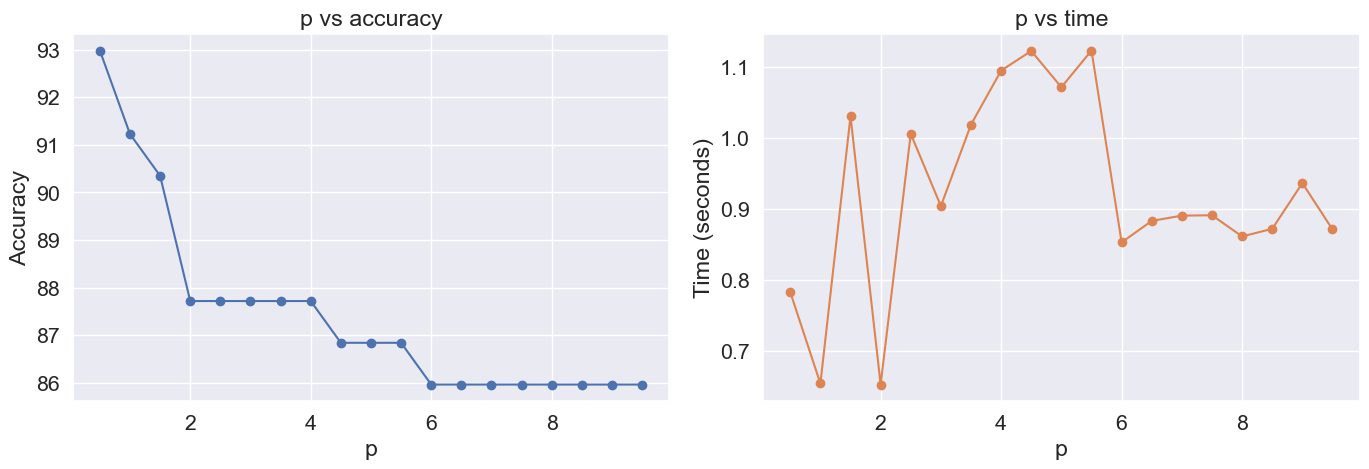

In [143]:
p_grid = np.arange(0.5,10,0.5)
accuracies = []
times = []

for p in p_grid:
    clf = KNN_Model(k=5, metric='minkowski',p=p)
    clf.fit(X_train.values, y_train.values)
    
    start = time.time()
    preds = clf.predict(X_test.values)
    stop = time.time()
    
    acc = accuracy(preds, y_test)
    accuracies.append(acc)
    times.append(stop-start)
    
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(p_grid, accuracies, marker='o')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.title('p vs accuracy')

plt.subplot(1,2,2)
plt.plot(p_grid, times, marker='o', c='C1')
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.title('p vs time')
plt.tight_layout()
plt.show()

#### Nhận xét:
* 
    1. Độ chính xác cao nhất với các giá trị nhỏ của p và sau đó giảm đột ngột. <br>
    2. Thời gian dự đoán không phụ thuộc vào p. Điều này là do phương pháp không thay đổi bất kỳ phần quan trọng nào của thuật toán.

<a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH <br> (MODEL EVALUATION AND COMPARISON) </p>


### So sánh mô hình

Sử dụng thư viện sklearn với module KNeighborsClassifier để so sánh với mô hình tự xây dựng (tham số mặc định là độ đo ecludian)

In [144]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train.values, y_train.values)
preds = clf.predict(X_test.values)

def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()
print(f'Sklearn accuracy: {accuracy(preds, y_test):.3f} %')

Sklearn accuracy: 87.719 %


### Đánh giá hiệu suất mô hình (Model performance analysis)

#### 1. Confusion Matrix

Confusion matrix là một kỹ thuật được sử dụng để tổng hợp hiệu suất của một thuật toán phân loại, nó có đầu ra nhị phân.



#### ***Ví dụ về bệnh ung thư***:


###### Các trường hợp mà bác sĩ dự đoán YES (họ có bệnh),và họ thực sự có bệnh sẽ được gọi là TRUE POSITIVES (TP).  Bác sĩ đã dự đoán đúng rằng bệnh nhân có bệnh.

###### Các trường hợp mà bác sĩ dự đoán NO (họ không có bệnh), và họ thực sự không có bệnh sẽ được gọi là TRUE NEGATIVES (TN). Bác sĩ đã dự đoán đúng rằng bệnh nhân không có bệnh.

###### Các trường hợp mà bác sĩ dự đoán YES, nhưng họ không có bệnh sẽ được gọi là FALSE POSITIVES (FP). Còn được gọi là “Type I error”.

###### Các trường hợp mà bác sĩ dự đoán NO,  nhưng họ có bệnh sẽ được gọi là FALSE NEGATIVES (FN). Còn được gọi là “Type II error”.

In [161]:
y_pred = clf.predict(X_test.values)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test.values, y_pred)

# Hiển thị ma trận nhầm lẫn
print("Confusion Matrix:")
print(pd.crosstab(y_test.values, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix:
Predicted   0   1  All
True                  
0          71   9   80
1           5  29   34
All        76  38  114


Text(0.5, 15.049999999999999, 'Predicted label')

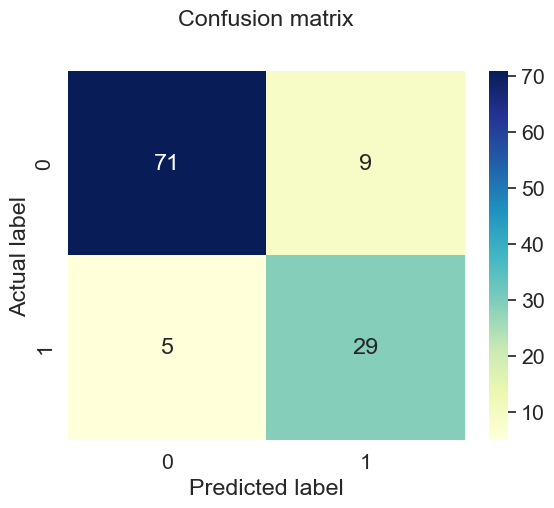

In [162]:
cnf_matrix = metrics.confusion_matrix(y_test.values, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Báo cáo phân loại
Báo cáo chi tiết về hiệu suất của mô hình phân loại trên tập dữ liệu kiểm thử
1. Precision (Độ chính xác): Là tỷ lệ giữa số lượng dự đoán đúng tích cực (True Positives) và tổng số lượng dự đoán tích cực (True Positives + False Positives). Precision cao đồng nghĩa với việc có ít dự đoán dương giả mạo. <br>

2. Recall (Tỉ lệ nhận diện): Là tỷ lệ giữa số lượng dự đoán đúng tích cực (True Positives) và tổng số lượng thực sự tích cực (True Positives + False Negatives). Recall cao đồng nghĩa với việc có ít trường hợp tích cực thực sự bị bỏ sót. <br>

3. F1-Score: Là một trung bình điều hòa giữa Precision và Recall. Nó được tính bằng công thức: F1-Score = 2 * (Precision * Recall) / (Precision + Recall). F1-Score cao nếu cả Precision và Recall đều cao. <br>

4. Support: Số lượng mẫu thực sự thuộc mỗi lớp.

In [163]:

print(classification_report(y_test.values,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        80
           1       0.76      0.85      0.81        34

    accuracy                           0.88       114
   macro avg       0.85      0.87      0.86       114
weighted avg       0.88      0.88      0.88       114



### Nhận xét:

1. Precision (Độ chính xác):

    Cho lớp 0: 93% - Độ chính xác cao, chỉ có một tỷ lệ nhỏ các trường hợp dự đoán tích cực nhưng thực sự là âm.
    Cho lớp 1: 76% - Có một số dự đoán tích cực nhưng thực sự là âm.
2. Recall (Tỉ lệ nhận diện):

    Cho lớp 0: 89% - Tỉ lệ đánh giá cao, chỉ có một tỷ lệ nhỏ các trường hợp thực sự tích cực bị bỏ sót.
    Cho lớp 1: 85% - Tỉ lệ đánh giá khá cao.
3. F1-Score:

    Cho lớp 0: 91% - F1-score là một trung bình điều hòa giữa precision và recall, độ chính xác cao.
    Cho lớp 1: 81% - F1-score có vẻ giảm do precision và recall không cân bằng.
4. Accuracy (Độ chính xác tổng thể):

    88% - Tỉ lệ dự đoán đúng trên toàn bộ tập kiểm thử.

<a id='7'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TỐI ƯU HÓA SIÊU THAM SỐ <br> (Hyper Parameter optimization) </p>


### Đối với độ đo euclidean

In [173]:
# Dựng hàm tối ưu
def objective_mks(trial):
    k = trial.suggest_int('k', 1, 30)

    clf = KNN_Model(k=k,metric='euclidean')
    clf.fit(X_train.values, y_train.values)
    
    preds = clf.predict(X_test.values)
    acc = accuracy(y_test.values, preds)

    return acc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_mks, n_trials=100)

best_params = study.best_params
best_k = best_params['k']

best_clf = KNN_Model(k=best_k,metric='euclidean')
best_clf.fit(X_train.values, y_train.values)
best_preds = best_clf.predict(X_test.values)
best_accuracy = accuracy(y_test.values, best_preds)

In [175]:
print(f"Giá trị k tốt nhất: {best_k}")
print(f"Accuracy tốt nhất : {best_accuracy:.3f}")

Giá trị k tốt nhất: 9
Accuracy tốt nhất : 89.474


### Đối với độ đo manhattan

In [176]:
# Dựng hàm tối ưu
def objective_mht(trial):
    k = trial.suggest_int('k', 1, 30)

    clf = KNN_Model(k=k,metric='manhattan')
    clf.fit(X_train.values, y_train.values)
    
    preds = clf.predict(X_test.values)
    acc = accuracy(y_test.values, preds)

    return acc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_mht, n_trials=100)

best_params = study.best_params
best_k = best_params['k']

best_clf = KNN_Model(k=best_k,metric='manhattan')
best_clf.fit(X_train.values, y_train.values)
best_preds = best_clf.predict(X_test.values)
best_accuracy = accuracy(y_test.values, best_preds)

In [178]:
print(f"Giá trị k tốt nhất: {best_k}")
print(f"Accuracy tốt nhất : {best_accuracy:.3f}")

Giá trị k tốt nhất: 5
Accuracy tốt nhất : 91.228


### Đối với độ đo minkowski

In [166]:
# Dựng hàm tối ưu
def objective_mks(trial):
    p = trial.suggest_float('p', 0.5, 10.0, step=0.5)
    k = trial.suggest_int('k', 1, 30)

    clf = KNN_Model(k=k,metric='minkowski', p=p)
    clf.fit(X_train.values, y_train.values)
    
    preds = clf.predict(X_test.values)
    acc = accuracy(y_test.values, preds)

    return acc

In [ ]:
# Tiến hành tối ưu 
study = optuna.create_study(direction='maximize')
study.optimize(objective_mks, n_trials=100)

best_params = study.best_params
best_p = best_params['p']
best_k = best_params['k']

best_clf = KNN_Model(k=best_k, p=best_p,metric='minkowski')
best_clf.fit(X_train.values, y_train.values)
best_preds = best_clf.predict(X_test.values)
best_accuracy = accuracy(y_test.values, best_preds)


In [171]:
print(f"Giá trị p - k tốt nhất: {best_p}, k: {best_k}")
print(f"Accuracy tốt nhất : {best_accuracy:.3f}")

Giá trị p - k tốt nhất: 0.5, k: 10
Accuracy tốt nhất : 91.228


<a id='8'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> KẾT LUẬN VÀ HƯỚNG PHÁT TRIỂN <br> (CONCLUSION AND DEVELOPMENT DIRECTIONS) </p>

### 1.	Kết luận <br>
Việc nghiên cứu ví dụ là công tác chẩn đoán ung thư vú đã phần nào phản ảnh được hiệu suất cũng như những đặc điểm của mô hình knearestneibough . Việc sử dụng thuật toán tuy đơn giản những vẫn mang lại hiệu quả cao đối với những trường hợp đặc thù.
Trong quá trình nghiên cứu và phát triển thuật toán, nhóm đã rút ra được những đặc điểm sau nếu áp dụng thuật toán vào thực tế cuộc sống: 

Về ưu điểm:
-	Việc triển khai và sử dụng KNN không đòi hỏi nhiều kiến thức toán học phức tạp.
-	KNN linh hoạt trong việc sử dụng trên nhiều dữ liệu bởi nó không phụ thuộc nhiều vào phân phối.
-	Có thể chia nhóm dữ liệu có cấu trúc phức tạp và không tuyến tính.

Về nhược điểm:
-	Có thể nhạy cảm với dữ liệu nhiễu và có thể bị ảnh hưởng bởi chiều cao khác biệt của các đặc trưng.
-	Cần lưu toàn bộ dữ liệu đào tạo trong bộ nhớ. Điều này có thể tạo ra vấn đề về hiệu suất khi dữ liệu lớn.
-   Khi số chiều của dữ liệu tăng, khoảng cách giữa các điểm dữ liệu có thể trở nên không hiệu quả và dẫn đến hiệu suất kém.
-   Việc chọn giá trị k phù hợp có thể ảnh hưởng đến kết quả của thuật toán. Giá trị k quá nhỏ có thể dẫn đến tình trạng quá mức tương quan, trong khi giá trị k quá lớn có thể làm giảm độ chính xác.


### 2.	Hướng phát triển
Dựa trên những phân tích của nhóm, các yếu tố đánh giá ở trên, nhóm đưa ra những hướng phát triển khả dụng sau cho đề tài:
-   Support Vector Machine (SVM): SVM là một mô hình mạnh mẽ cho việc phân loại và học máy.
-   Random Forest: Random Forest là một mô hình thuật toán học tập dựa trên cây quyết định, có khả năng xử lý cả dữ liệu có cấu trúc và không có cấu trúc.
-   Neural Networks (Deep Learning): Mạng nơ-ron sâu (Deep Neural Networks) có khả năng học tự động các đặc trưng phức tạp từ dữ liệu.
-   Logistic Regression: Phù hợp cho các nhiệm vụ phân loại nhị phân và có thể được mở rộng cho nhiều lớp.
-   Mô Hình Học Sâu (Deep Learning): Sử dụng các mô hình học sâu như mạng nơ-ron tích chập (CNN) để tự động rút trích đặc trưng từ hình ảnh và cải thiện khả năng chẩn đoán.
-   Mô Hình Học Máy Tăng Cường (Ensemble Models): Kết hợp nhiều mô hình học máy để cải thiện độ chính xác và ổn định.